<a href="https://colab.research.google.com/github/afaundez/ml-final/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Error helper

In [ ]:
class InputError(Exception):
    """Exception raised for errors in the input.

    Attributes:
        expression -- input expression in which the error occurred
        message -- explanation of the error
    """

    def __init__(self, expression, message):
        self.expression = expression
        self.message = message

## fix matrix vector helper (no used)

In [ ]:
import doctest

import numpy as np

class Ensure:
  def vector(y):
    '''
    >>> Ensure.vector([1, 2, 3, 4])
    array([[1],
           [2],
           [3],
           [4]])
    >>> Ensure.vector(1)
    array([1])
    '''
    vector = np.atleast_1d(y)
    if vector.ndim != 1 or vector.size == 0:
      raise InputError(y, 'y is not a potential vector')
    print(vector)
    vector = np.atleast_2d(vector.T)
    print(vector)
    return vector

  def matrix(X):
    '''
    >>> Ensure.matrix([[1, 2], [3, 4]])
    array([[1, 2],
           [3, 4]])
    >>> Ensure.matrix([1, 2, 3, 4])
    array([[1, 2, 3, 4]])
    >>> Ensure.matrix(1)
    array([[1]])
    '''
    matrix = np.atleast_2d(X)
    # if np.array(X).ndim == 1:
    #   matrix = matrix.T
    if matrix.ndim != 2 and 0 < matrix.shape[1]:
      raise InputError(X, 'y is not a potential matrix')
    return matrix

  def scalar(matrix_or_vector_or_scalar):
    '''
    >>> Ensure.scalar([[1]])
    1
    >>> Ensure.scalar([1])
    1
    >>> Ensure.scalar(1)
    1
    >>> Ensure.scalar([[1, 2]])
    Traceback (most recent call last):
      ...
    InputError: ([[1, 2]], 'matrix_or_vector_or_scalar is not a potential scalar')
    >>> Ensure.scalar([1, 2])
    Traceback (most recent call last):
      ...
    InputError: ([1, 2], 'matrix_or_vector_or_scalar is not a potential scalar')
    >>> Ensure.scalar([])
    Traceback (most recent call last):
      ...
    InputError: ([], 'matrix_or_vector_or_scalar is not a potential scalar')
    '''
    matrix = np.atleast_2d(matrix_or_vector_or_scalar)
    if matrix.shape != (1, 1):
      raise InputError(matrix_or_vector_or_scalar, 'matrix_or_vector_or_scalar is not a potential scalar')
    return matrix.item()


## Row Filter/Feature Picker

In [ ]:
import doctest

import numpy as np

class RowFilter:
  def transform(X, y, c):
    '''
    >>> RowFilter.transform([0, 1, 2, 3, 4], [0, 1, 0, 1, 0], 0)
    array([[0],
           [2],
           [4]])
    >>> RowFilter.transform([0, 1, 2, 3, 4], [0, 1, 0, 1, 0], 1)
    array([[1],
           [3]])
    >>> RowFilter.transform([0, 1, 2, 3, 4], [0, 1, 0, 1, 0], 2)
    array([], shape=(1, 0), dtype=float64)
    >>> RowFilter.transform([[0], [1], [2], [3], [4]], [0, 1, 0, 1, 0], 0)
    array([[0],
           [2],
           [4]])
    >>> RowFilter.transform([[0, 1, 2, 3, 4]], [0, 1, 0, 1, 0], 0)
    >>> RowFilter.transform([], [0, 1, 0, 1, 0], 1)
    Traceback (most recent call last):
      ...
    InputError: ((array([[0],
           [1],
           [2],
           [3],
           [4]]), array([], dtype=float64), 0), "X is None, Empty or X and y lengths don't match")
    >>> RowFilter.transform([0, 1, 2, 3, 4], [], 1)
    Traceback (most recent call last):
      ...
    InputError: ((array([[0],
           [1],
           [2],
           [3],
           [4]]), array([], dtype=float64), 1), "X is None, Empty or X and y lengths don't match")
    '''
    if type(X)== list and np.array(X).ndim == 1:
      X = np.atleast_2d(X).T
    else:
      X = np.atleast_2d(X)
    y = np.atleast_1d(y)
    if X is None or len(X) == 0 or X.shape[0] != y.shape[0]:
      raise InputError((X, y, c), 'X is None, Empty or X and y lengths don\'t match')
    X_c = [ X[z] for z, c_z in enumerate(y) if c_z == c ]
    return np.atleast_2d(X_c)

class FeaturePicker:
  def transform(X, Q):
    '''
    >>> FeaturePicker.transform([[0, 1, 2, 3, 4]], [0, 2, 4])
    array([[0, 2, 4]])
    >>> FeaturePicker.transform([[0, 1, 2, 3, 4]], 1)
    array([[1]])
    >>> FeaturePicker.transform([[0]], [0])
    array([[0]])
    >>> FeaturePicker.transform([], [0])
    Traceback (most recent call last):
      ...
    IndexError: index 0 is out of bounds for axis 1 with size 0
    >>> FeaturePicker.transform([[0]], [1])
    Traceback (most recent call last):
      ...
    IndexError: index 1 is out of bounds for axis 1 with size 1
    >>> FeaturePicker.transform([[0, 1, 2, 3, 4]], [])
    Traceback (most recent call last):
      ...
    InputError: ((array([[0, 1, 2, 3, 4]]), []), 'Q is None so X will be empty')
    '''
    #print("X:", X)
    X = np.atleast_2d(X)
    #print("2d X:", X)
    if Q is None or np.array(Q).size == 0:
      raise InputError((X, Q), 'Q is None so X will be empty')
    if X.ndim != 2:
      raise InputError(X, 'X is not 2 dimensional')
    return np.atleast_2d(X[:, Q])

In [ ]:
X = [0, 1, 2, 3, 4]
print(type(X))
print(type(X) == list)
print('X', np.array(X).shape)
y = [0, 1, 0, 1, 0]
X = np.atleast_2d(X).T
print('np.atleast_2d(X).T', X.shape)

<class 'list'>
True
X (5,)
np.atleast_2d(X).T (5, 1)


## Space

In [ ]:
import doctest

import numpy as np

class Space:
  def __init__(self, X, Sigma=None):
    '''
    X must have at least two dimensions and 2 observations
    >>> X = np.array([4.0, 4.2, 3.9, 4.3, 4.1, 2.0, 2.1, 2.0, 2.1, 2.2, 0.60, 0.59, 0.58, 0.62, 0.63]).reshape((3, 5)).T
    >>> space = Space(X)
    >>> space.Sigma
    array([[0.02    , 0.006   , 0.0014  ],
           [0.006   , 0.0056  , 0.00108 ],
           [0.0014  , 0.00108 , 0.000344]])
    >>> space.Lambda
    array([[0.02230155, 0.        , 0.        ],
           [0.        , 0.00351509, 0.        ],
           [0.        , 0.        , 0.00012736]])
    >>> space.inverse_Lambda
    array([[  44.83993667,    0.        ,    0.        ],
           [   0.        ,  284.48757096,    0.        ],
           [   0.        ,    0.        , 7851.76223596]])
    '''
    self.X = np.atleast_2d(X)
    self.mu = np.mean(self.X) 
    if Sigma is None:
      self.Sigma = np.cov(self.X, rowvar=False, bias=True)
    else:
      self.Sigma = Sigma
    self.Sigma = np.atleast_2d(self.Sigma)
    self.lambdas, self.V = np.linalg.eig(self.Sigma)
    self.Lambda = np.diag(self.lambdas)
    if self.X.shape[1] == 1 and self.Lambda.item() == 0:
      self.inverse_Lambda = np.array([[1]])
    else:
      self.inverse_Lambda = np.diag(1. / self.lambdas)
    self.distances = [self.distance_lambda(x) for x in self.X]
    self.subspace = None
  
  def projection(self, f_threshold):
    '''
    >>> X = np.array([4.0, 4.2, 3.9, 4.3, 4.1, 2.0, 2.1, 2.0, 2.1, 2.2, 0.60, 0.59, 0.58, 0.62, 0.63]).reshape((3, 5)).T
    >>> space = Space(X)
    >>> subspace = space.projection(f_threshold=.9)
    >>> subspace.X
    array([[ 4.47594928, -0.54395965],
           [ 4.69668579, -0.56475525],
           [ 4.38074197, -0.57571693],
           [ 4.79265835, -0.53459857],
           [ 4.64021798, -0.69842923]])
    '''
    selected_lambdas, selected_indexes = self.select_principal_components(f_threshold)
    self.S = self.V[:, selected_indexes]
    Y = self.project(self.X)
    self.subspace = Space(Y)
  
  def project(self, X):
    return (self.S.T @ X.T).T

  def distance_lambda(self, x_z):  
    '''
    >>> X = np.array([4.0, 4.2, 3.9, 4.3, 4.1, 2.0, 2.1, 2.0, 2.1, 2.2, 0.60, 0.59, 0.58, 0.62, 0.63]).reshape((3, 5)).T
    >>> space = Space(X)
    >>> space.distance_lambda(X[0]).dtype
    dtype('float64')
    >>> X = np.array([4.0, 4.2, 3.9, 4.3, 4.1, 2.0, 2.1, 2.0, 2.1, 2.2, 0.60, 0.59, 0.58, 0.62, 0.63]).T
    >>> space = Space(X)
    >>> space.distance_lambda(X[0]).dtype
    dtype('float64')
    >>> space.distance_lambda(4.0).dtype
    dtype('float64')
    >>> space.distance_lambda([[4.0]]).dtype
    dtype('float64')
    '''
    x = np.atleast_2d(x_z)
    if 1 < x[0].size:
      x = x.T
    if self.X.shape[1] == 1 and self.Lambda.item() == 0:
        distance = (x-self.mu).T @ self.inverse_Lambda @ (x-self.mu)
    else:
      distance = (x-self.mu).T @ self.inverse_Lambda @ (x-self.mu)
    return distance.item()

  def distance_sigma(self,x):
    return x.T @ (1 / self.Sigma) @ x

  def select_principal_components(self, f_threshold):
    '''
    >>> X = np.array([4.0, 4.2, 3.9, 4.3, 4.1, 2.0, 2.1, 2.0, 2.1, 2.2, 0.60, 0.59, 0.58, 0.62, 0.63]).reshape((3, 5)).T
    >>> space = Space(X)
    >>> space.select_principal_components(1.)
    (array([0.02230155, 0.00351509, 0.00012736]), array([0, 1, 2]))
    >>> space.select_principal_components(f_threshold=.9)
    (array([0.02230155, 0.00351509]), array([0, 1]))
    '''
    sorted_indexed_lambdas = np.array(sorted(enumerate(self.lambdas), key=lambda obj: obj[1], reverse=True))
    sorted_indexes = sorted_indexed_lambdas[:, 0].astype(int)
    sorted_lambdas = sorted_indexed_lambdas[:, 1]
    
    percentages = sorted_lambdas / sorted_lambdas.sum()
    accum = np.cumsum(percentages)
    E = [ i + 1 for (i, v) in enumerate(accum) if f_threshold <= v or i == len(accum) - 1][0]
    print("The number of principal component for this class is", E)
    return sorted_lambdas[:E], sorted_indexes[:E]

## Classifier

In [ ]:
import doctest

import numpy as np

class MahalanobisClassifier:

  DEFAULT_PROJECTION_THRESHOLD = .95
  DEFAULT_P_0 = .95

  def fit(self, X, y, Q, C, project=False, projection_thresholds=None):
    self.X = np.atleast_2d(X)
    self.y = np.atleast_1d(y)
    self.Q = Q
    self.C = C
    #print(self.X.ndim, self.y, self.X.shape, self.y.shape[0])
    if self.X.ndim != 2 or self.y.ndim != 1 or self.X.shape[0] != self.y.shape[0]:
      raise InputError((X, y), 'X and y dimensions don\'t match or X is not 2d or y is not 1d')
    self.C = np.array(range(0, np.max(y) + 1))
    self.spaces = []
    for c in self.C:
      X_c = RowFilter.transform(self.X, self.y, c)
      X_c_Q = FeaturePicker.transform(X_c, self.Q[c])
      space = Space(X_c_Q)
      if project:
        if projection_thresholds:
          threshold = projection_thresholds[c]
        else:
          threshold = float(input(f'Enter your projection threshold for class {c}: '))
          # threshold = MahalanobisClassifier.DEFAULT_PROJECTION_THRESHOLD
        space.projection(threshold)
      self.spaces.append(space)
    return self.spaces


  def calculate_p_for_each_c(self, x_z):
    '''
    >>> X = np.array([[-1, 2, 3], [-4, 5, 6], [-7, 8, 9], [-10, 11, 12]])
    >>> y = np.array([0, 1, 0, 1])
    >>> Q = [[0,1], [2]]
    >>> C = np.unique(y)
    >>> x_z = np.array([1, 1, 1])
    >>> classifier = MahalanobisClassifier()
    >>> classifier.fit(X, y, Q, C)
    >>> classifier.calculate_p_for_each_c(x_z)
    array()
    '''

    p = []
    for c, space in enumerate(self.spaces):
      x_z_c = FeaturePicker.transform(x_z, self.Q[c])
      if space.subspace is None:
        x_z_distance_c = space.distance_lambda(x_z_c)
        train_distances_c = sorted(space.distances)
      else:
        x_z_c = space.project(x_z_c)
        projected_space = space.subspace
        x_z_distance_c = projected_space.distance_lambda(x_z_c)
        train_distances_c = sorted(projected_space.distances )
      z_c = len(train_distances_c)
      if x_z_distance_c <= np.min(train_distances_c):
        p.append(1 / z_c)
      elif np.max(train_distances_c) < x_z_distance_c:
        p.append(1)
      else:
        for j in range(0, z_c - 1):
          if train_distances_c[j] < x_z_distance_c <= train_distances_c[j+1]:
            p.append((j + 1- .5) / z_c)
      if len(p) == 0:
        print("X:", x_z_c, "test distance:" , x_z_distance_c, "traindisatnces:", train_distances_c)
        print("the projected space:", vars(space))
    return p
    
  def predict(self, x_z, p_0):
  #p_0 is an array, one for each class
    # if p_0 == None:
    #   p_0 = MahalanobisClassifier.DEFAULT_P_0
    p_values = self.calculate_p_for_each_c(x_z)

    prediction = 'reserved class'
    smallest_p_value = -1

    for i,  one_p0 in enumerate(p_0):
      if one_p0 >= p_values[i]:
        if prediction == 'reserved class' or p_values[i] < smallest_p_value:
          prediction = i
          smallest_p_value = p_values[i]
    return prediction


## A / Essential Features

In [ ]:
def feature_classifiers(I, C):
  classifiers = []
  for i in I:
    feature_Q = np.array([[i] for c in C])
    classifier = MahalanobisClassifier()
    classifier.fit(X_train, y_train, feature_Q, C, project=False)
    classifiers.append(classifier)
  return classifiers
  
def generate_A(X_test, y_test, I, C, classifiers, p_0s=None): #classifiers is a collection of classifier for each feature i
  #print('BEGIN generating A')
  A = np.zeros((len(I), len(C)))
  for i in I:
    #print("feature:", i)
    p_0 = p_0s[i] if p_0s != None else None
    for c in C:
      denominator = 0.0
      numerator = 0
      for z, c_z in enumerate(y_test):
        x_z = X_test[z]
        if c_z == c:
          denominator += 1
          if classifiers[i].predict(x_z, p_0) == c_z:
            numerator += 1
      if denominator != 0:
        A[i][c] = numerator/denominator 
  return A

def calculate_Q(C, I, A, thresholds=None):
  # select Q based on A
  #print("print A:", A)
  Q = {}
  for c in C:
    Q[c] = []
    if thresholds:
      threshold = thresholds[c]
    else:
      threshold = float(input(f'Enter your theta value ([0, 1]) for class {c}: '))
    for i in I:
      if A[i][c] > threshold:
        Q[c].append(i)
  #print("print Q:", Q)
  return Q

## Experiments

### Data sets

In [ ]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


########  Dataset 1 - Iris   ##########
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

###### Dataset 2 - Human Movement  ##########


# dataset_url = 'https://raw.githubusercontent.com/afaundez/csc74010-ai-hw/main/yX_sample_100K'
# dataset = pd.read_csv(dataset_url)
# dataset = dataset.transform(lambda x: x).astype(float)
# dataset = dataset.sample(frac=1, random_state=42).sample(1000)

# y_column_name = 'Coarse label'
# X = np.array(dataset.drop([y_column_name], axis=1))
# y = np.array(dataset[y_column_name]).astype(int)


##########  Dataset 3 - Fetal Health Dataset 'https://www.kaggle.com/andrewmvd/fetal-health-classification' ###########
url = "https://raw.githubusercontent.com/vickybwu/Myfiles/main/fetal_health.csv"
fetal_health_data = pd.read_csv(url, header=0)
#print(fetal_health_data.columns)
y_column_name = 'fetal_health'
X = np.array(fetal_health_data.drop(y_column_name, axis = 1))
y = np.array(fetal_health_data[y_column_name]).astype(int)
y = np.array([y_-1 for y_ in y])




########## Train Test Split ############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
print(X.shape, np.unique(y).size, X_train.shape, X_test.shape )


(2126, 21) 3 (1063, 21) (1063, 21)


### Generate A

In [ ]:
########## Calculate A #############


C = np.unique(y)
#print(np.unique(y_train), np.unique(y_test))
print(C)
I = range(0, X.shape[1])
print(I)

classifiers = feature_classifiers(I, C)
p_0s = [[.5 for c in C] for i in I]
print(p_0s)
A = generate_A(X_test, y_test, I, C, classifiers, p_0s=p_0s)
print(A)

[0 1 2]
range(0, 21)
[[0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
[[0.46079614 0.48322148 0.        ]
 [0.4933655  0.82550336 0.        ]
 [0.8854041  0.00671141 0.08235294]
 [0.28950543 0.59731544 0.2       ]
 [0.14234017 0.77181208 0.25882353]
 [1.         0.         0.        ]
 [0.95536791 0.         0.4       ]
 [0.54161641 0.26845638 0.27058824]
 [0.1013269  0.56375839 0.28235294]
 [0.09408926 0.00671141 0.69411765]
 [0.2509047  0.37583893 0.76470588]
 [0.14234017 0.37583893 0.44705882]
 [0.16405308 0.41610738 0.45882353]
 [0.13751508 0.20134228 0.4       ]
 [0.14234017 0.53691275 0.29411765]
 [0.7575392  0.         0.        ]
 [0.37032569 0.32885906 0.44705882]
 [0.41013

#### using different p_0 for each feature

In [ ]:
print(X.shape)
predictions_by_feature_by_p_0 = []
p_0s = np.linspace(0, 1, 101)
for i, classifier in enumerate(classifiers):
  print(f'Using feature={i}')
  feature_predictions = []
  for p_0 in p_0s:
    feature_predictions_by_p_0 = [classifier.predict(x, p_0) for x in X_test[:1000]]
    feature_predictions.append(feature_predictions_by_p_0)
  predictions_by_feature_by_p_0.append(feature_predictions)

accuracies_by_feature_by_p_0 = []
for i, feature_predictions_by_p_0 in enumerate(predictions_by_feature_by_p_0):
  feature_accuracies_by_p_0 = []
  for p_0, predictions in enumerate(feature_predictions_by_p_0):
    count = sum([ 1 if y_pred == y_true else 0 for y_pred, y_true in zip(predictions, y_test[:10]) ])
    feature_accuracies_by_p_0.append(count / len(y_test[:1000]))
  accuracies_by_feature_by_p_0.append(feature_accuracies_by_p_0)

(2126, 21)
Using feature=0
Using feature=1
Using feature=2
Using feature=3
Using feature=4
Using feature=5
Using feature=6
Using feature=7
Using feature=8
Using feature=9
Using feature=10
Using feature=11
Using feature=12
Using feature=13
Using feature=14
Using feature=15
Using feature=16
Using feature=17
Using feature=18
Using feature=19
Using feature=20


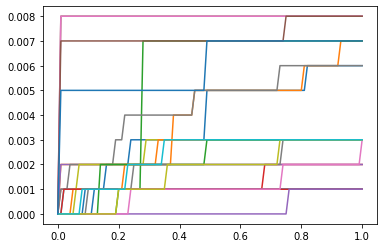

In [ ]:
import matplotlib.pyplot as plt
  
fig, ax = plt.subplots()
for i, feature_accuracies_by_p_0 in enumerate(accuracies_by_feature_by_p_0):
  ax.plot(p_0s, feature_accuracies_by_p_0)
plt.show()

### Calculate Q

In [ ]:
########### Calculate Q ##############
thresholds = [.2, .2, .2]
Q = calculate_Q(C, I, A, thresholds=thresholds)
print(Q)
# TODO: it fails when Q for class is empty


{0: [0, 1, 2, 3, 5, 6, 7, 10, 15, 16, 17, 18, 19, 20], 1: [0, 1, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20], 2: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]}


#### multiple Q/threshold plot

NameError: ignored

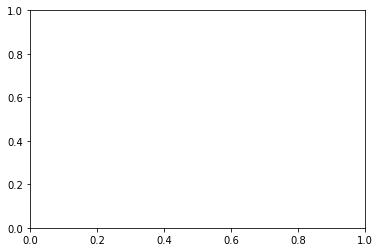

In [ ]:
test_thresholds = [i / 10.0 for i in range(0, 11)]
# print("Thresholds permutations")
# import itertools
# thresholds_permutations = list(itertools.permutations(test_thresholds, 3))

values = [[] for c in C]
for threshold in test_thresholds:
  thresholds = [threshold for c in C]
  result = calculate_Q(C, I, A, thresholds=thresholds)
  for (c, features) in result.items():
    values[c].append(len(features))

labels = test_thresholds
x = np.arange(len(labels))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
        
for c in C:
  y = values[c]
  rect = ax.bar(x + (1 - c)/(1 + len(C)), y, width, label=f'Class {c}')

ax.set_ylabel('Features')
ax.set_title('Features by class by Q threshold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
p_0_s = np.array([np.random.rand(3) for i in range(0,5)])
print(p_0_s)
[[], []]

[[0.9014057  0.3136214  0.8322259 ]
 [0.74437518 0.52107708 0.52263886]
 [0.73035315 0.21398193 0.63655575]
 [0.30205044 0.79178043 0.72082024]
 [0.34129632 0.61226087 0.25143635]]


## Plot accuracy against parameters

using projection threshold 0.9
The number of principal component for this class is 3
The number of principal component for this class is 3
The number of principal component for this class is 3


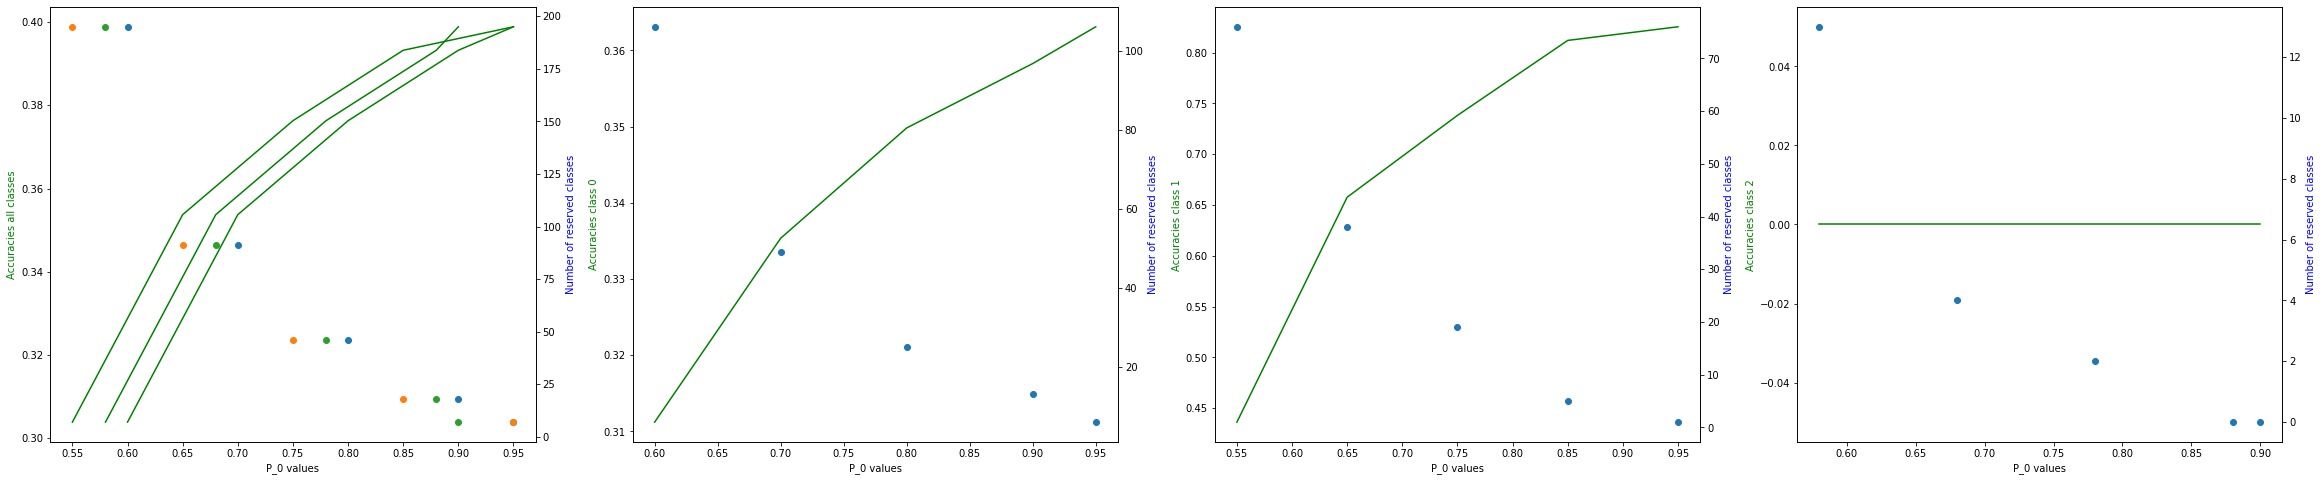

using projection threshold 0.91
The number of principal component for this class is 3
The number of principal component for this class is 3
The number of principal component for this class is 3


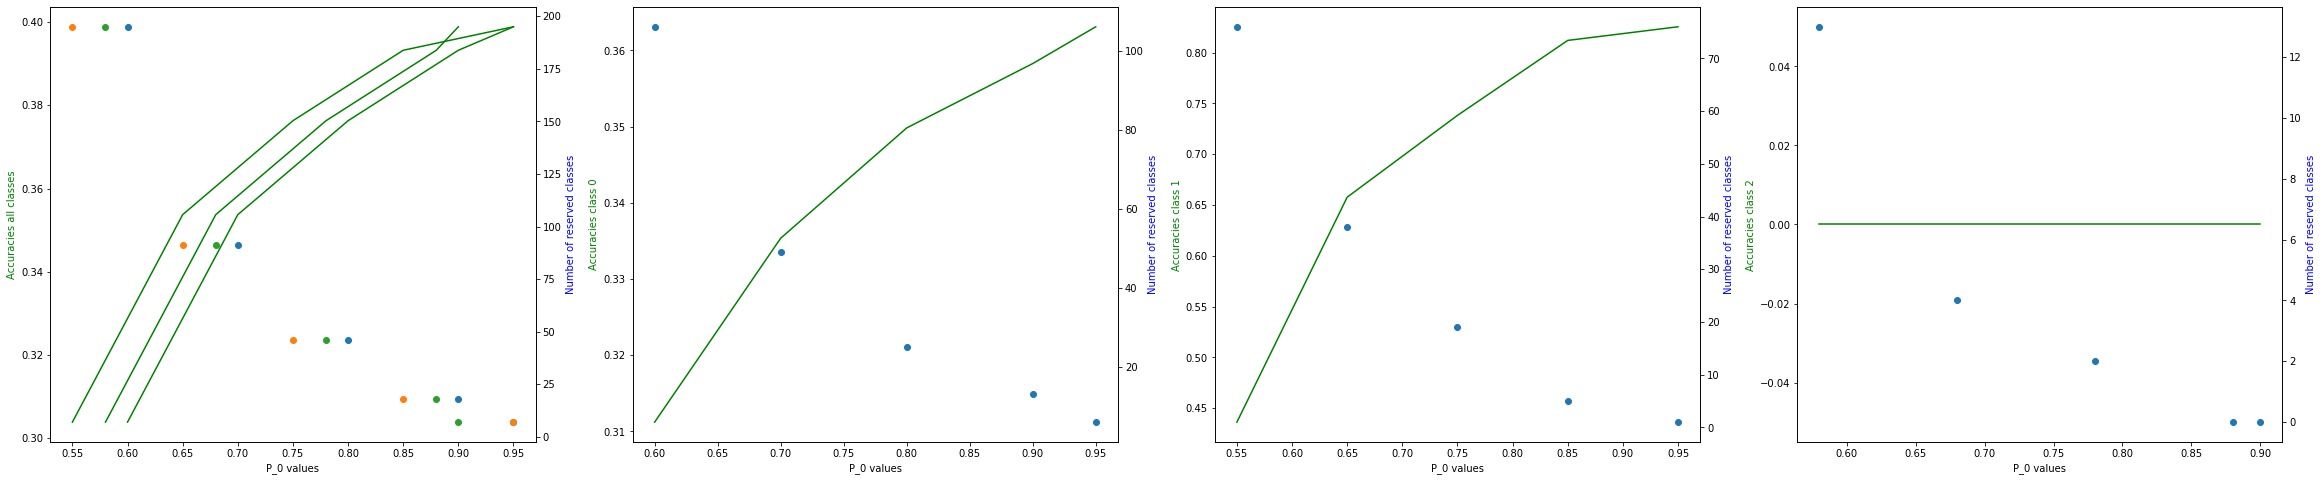

using projection threshold 0.92
The number of principal component for this class is 3
The number of principal component for this class is 3
The number of principal component for this class is 3


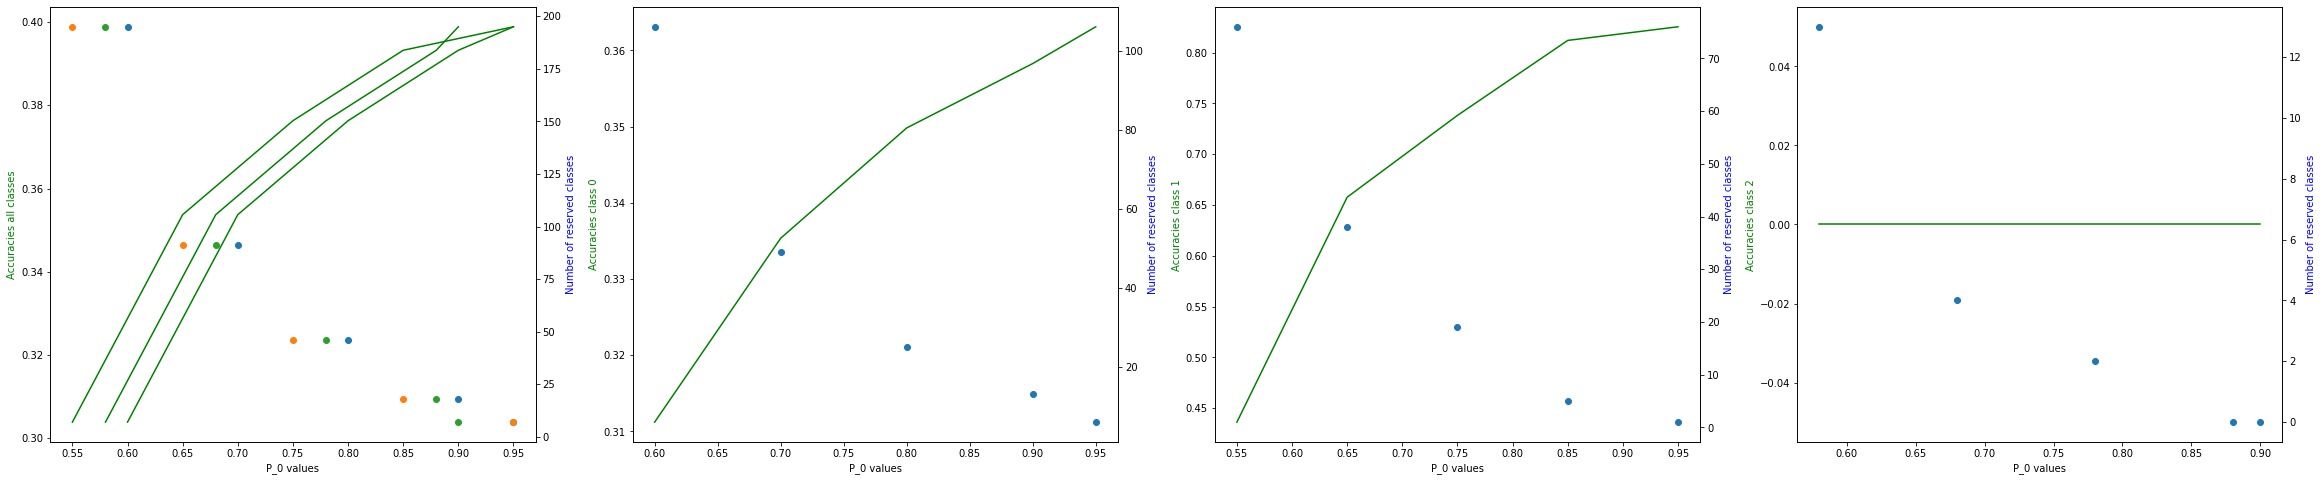

using projection threshold 0.93
The number of principal component for this class is 3
The number of principal component for this class is 3
The number of principal component for this class is 4


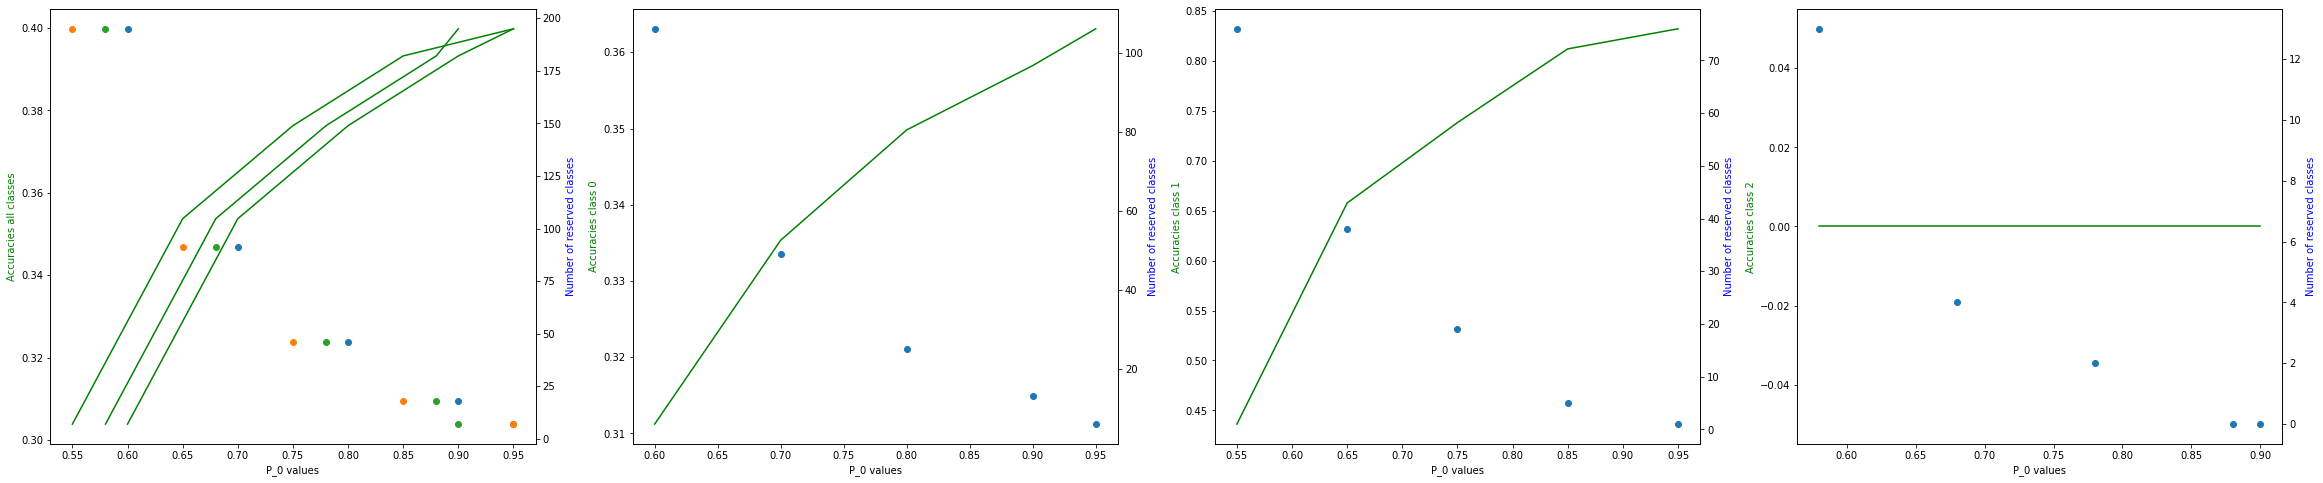

using projection threshold 0.9400000000000001
The number of principal component for this class is 3
The number of principal component for this class is 4
The number of principal component for this class is 4


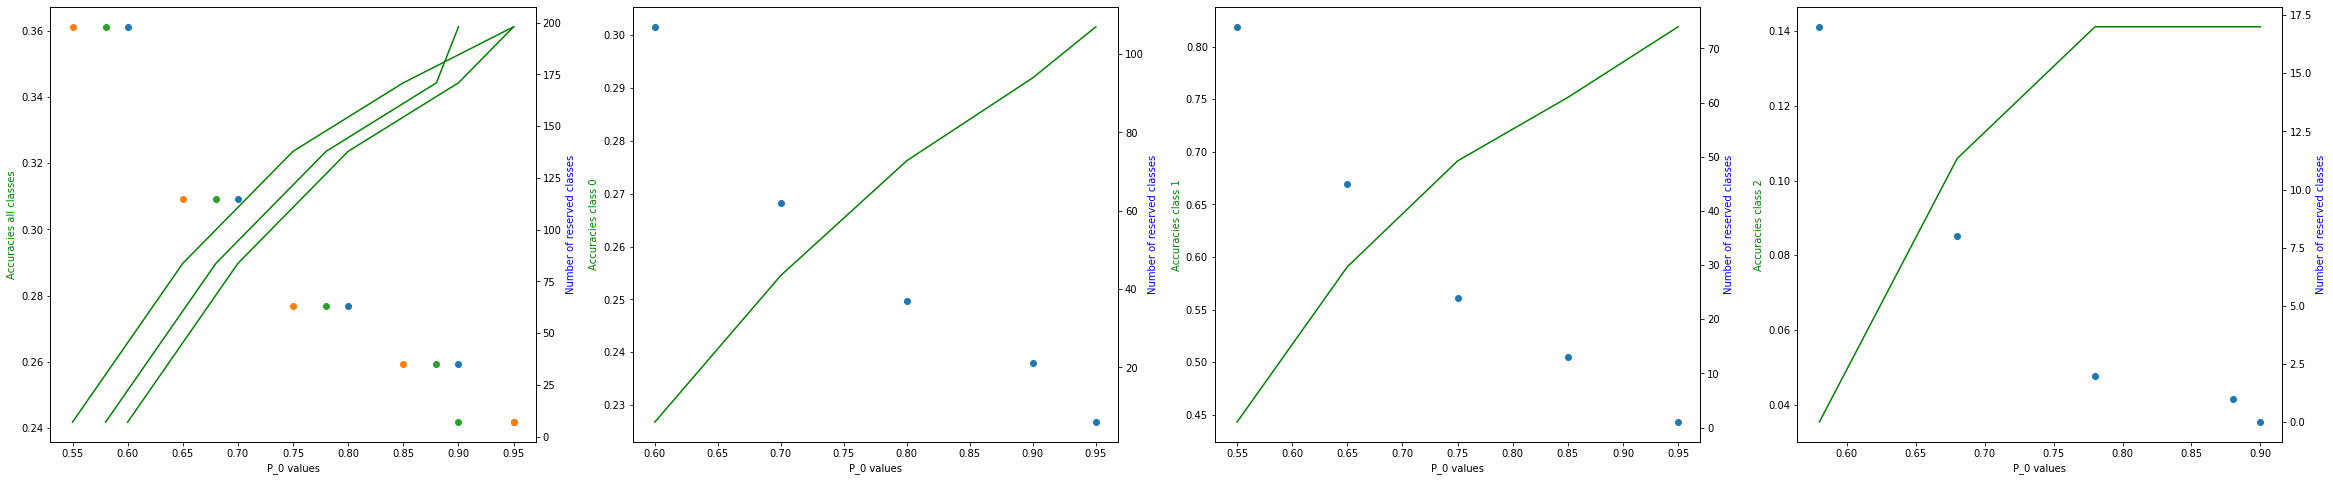

using projection threshold 0.9500000000000001
The number of principal component for this class is 4
The number of principal component for this class is 4
The number of principal component for this class is 4


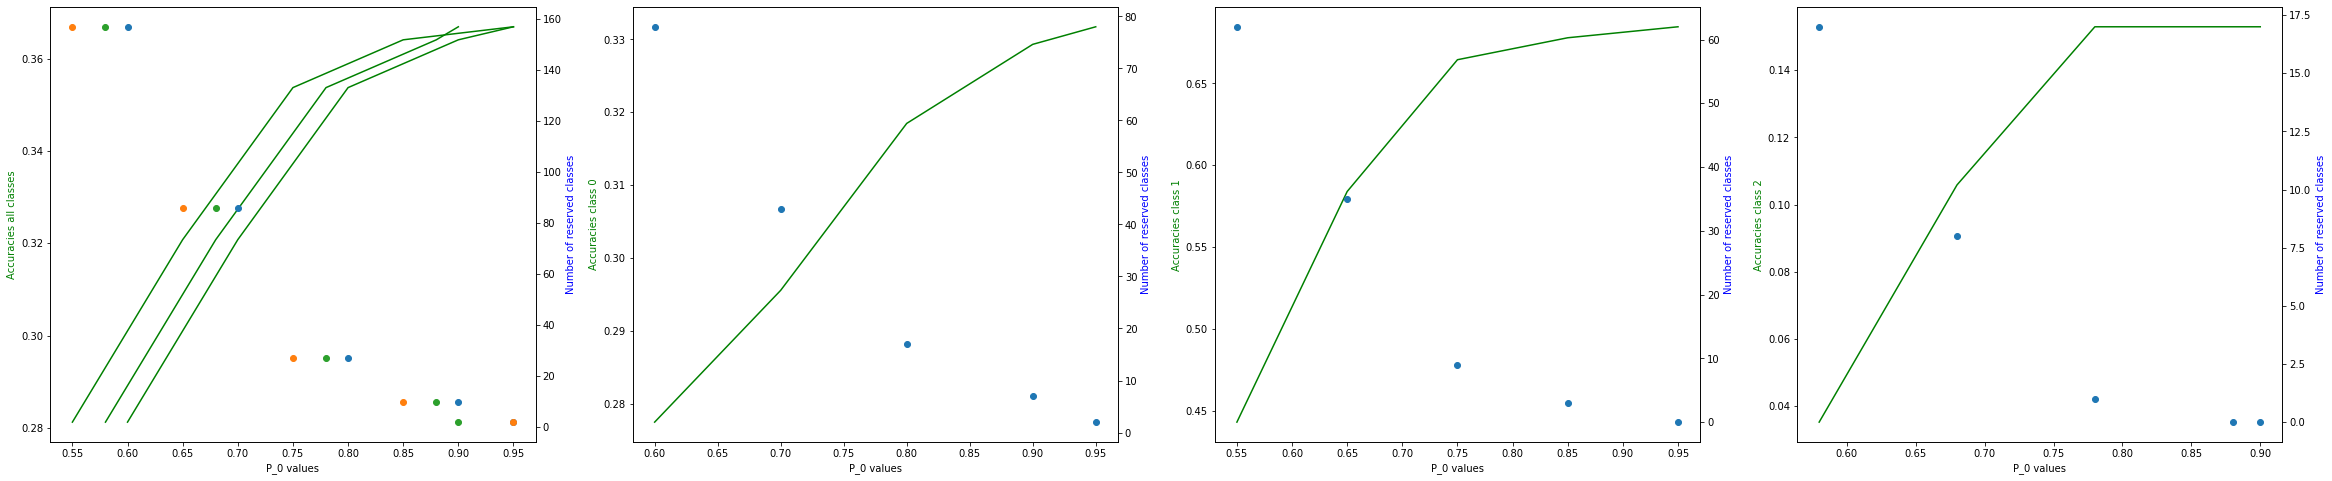

using projection threshold 0.96
The number of principal component for this class is 4
The number of principal component for this class is 4
The number of principal component for this class is 5


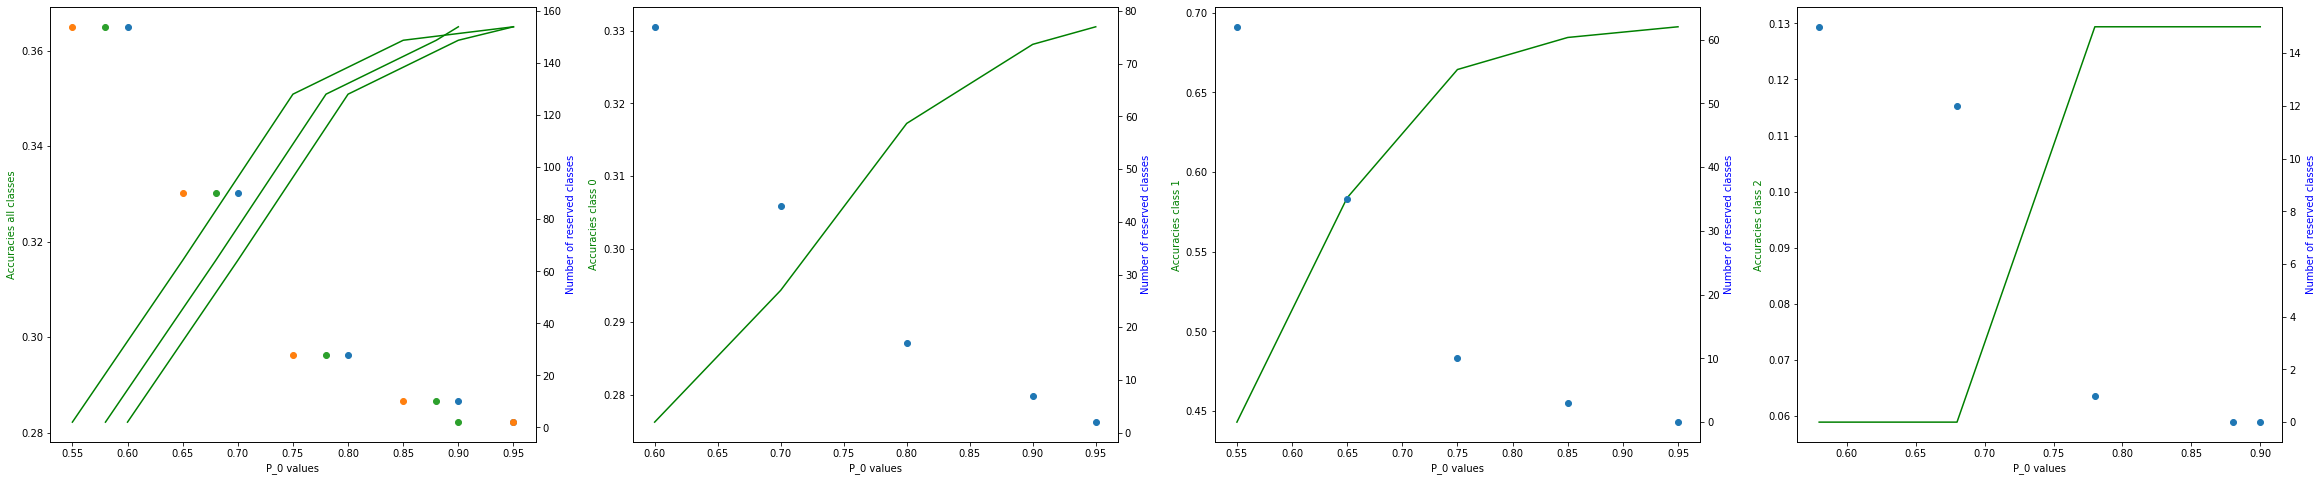

using projection threshold 0.97
The number of principal component for this class is 5
The number of principal component for this class is 5
The number of principal component for this class is 5


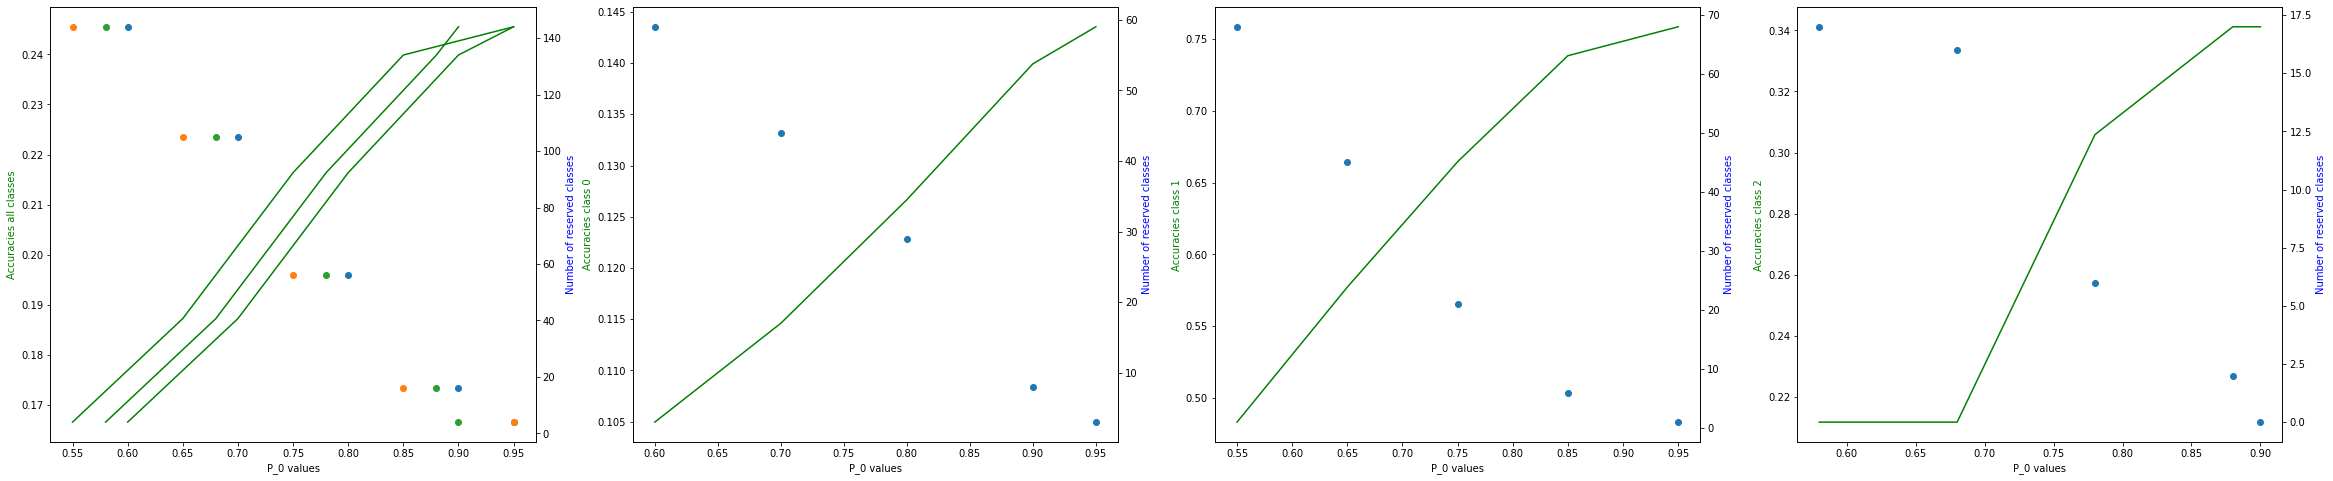

using projection threshold 0.98
The number of principal component for this class is 5
The number of principal component for this class is 5
The number of principal component for this class is 6


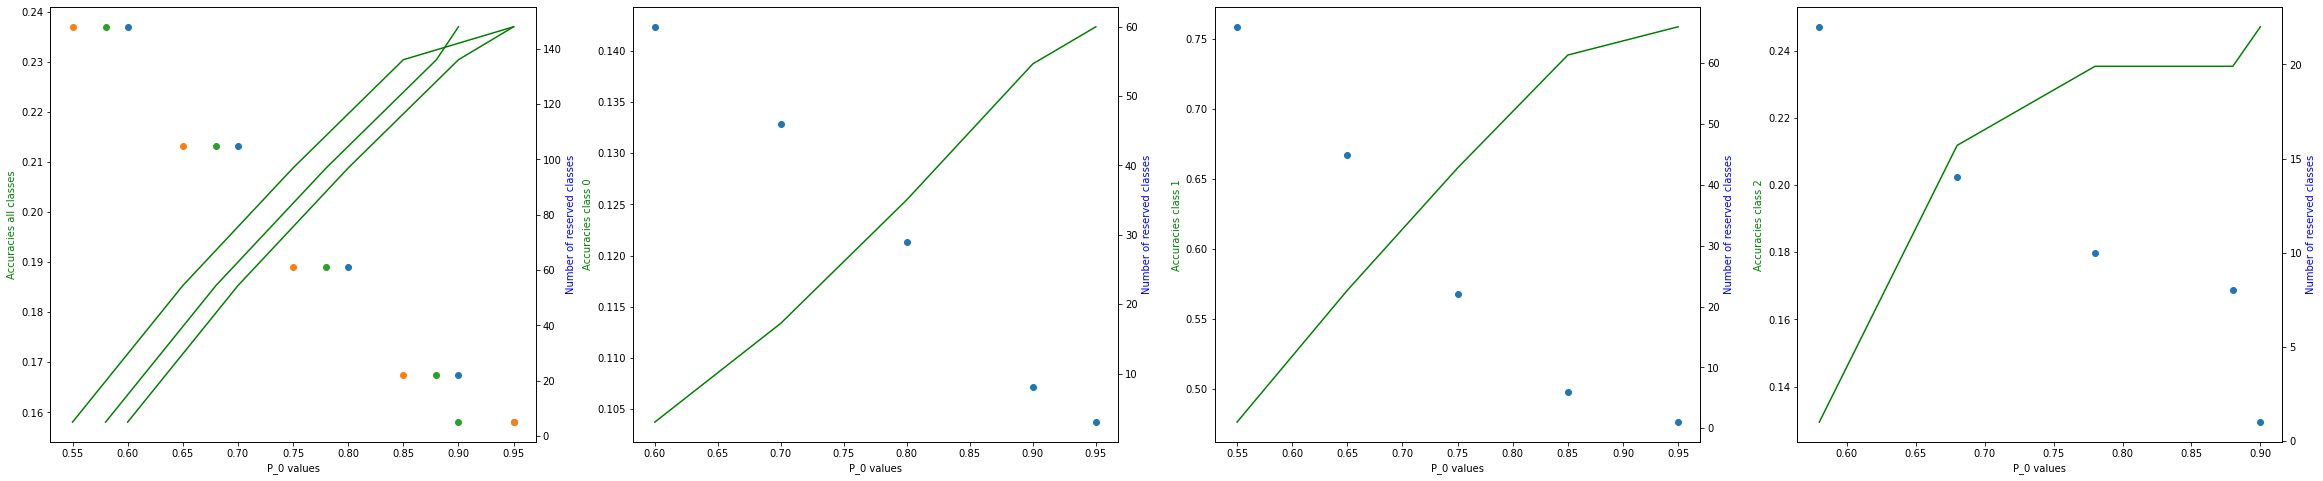

using projection threshold 0.99
The number of principal component for this class is 6
The number of principal component for this class is 5
The number of principal component for this class is 6


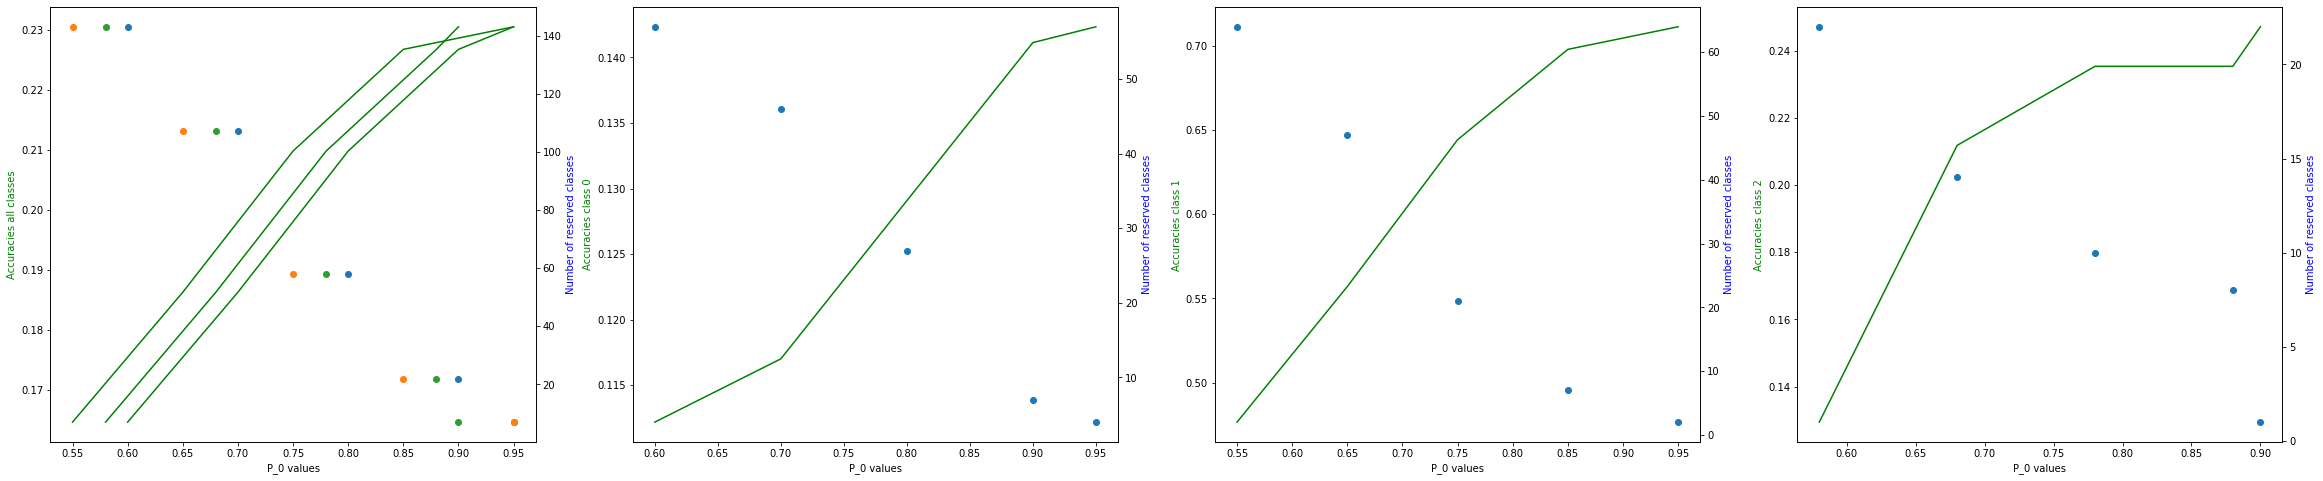

using projection threshold 1.0
The number of principal component for this class is 14
The number of principal component for this class is 16
The number of principal component for this class is 14


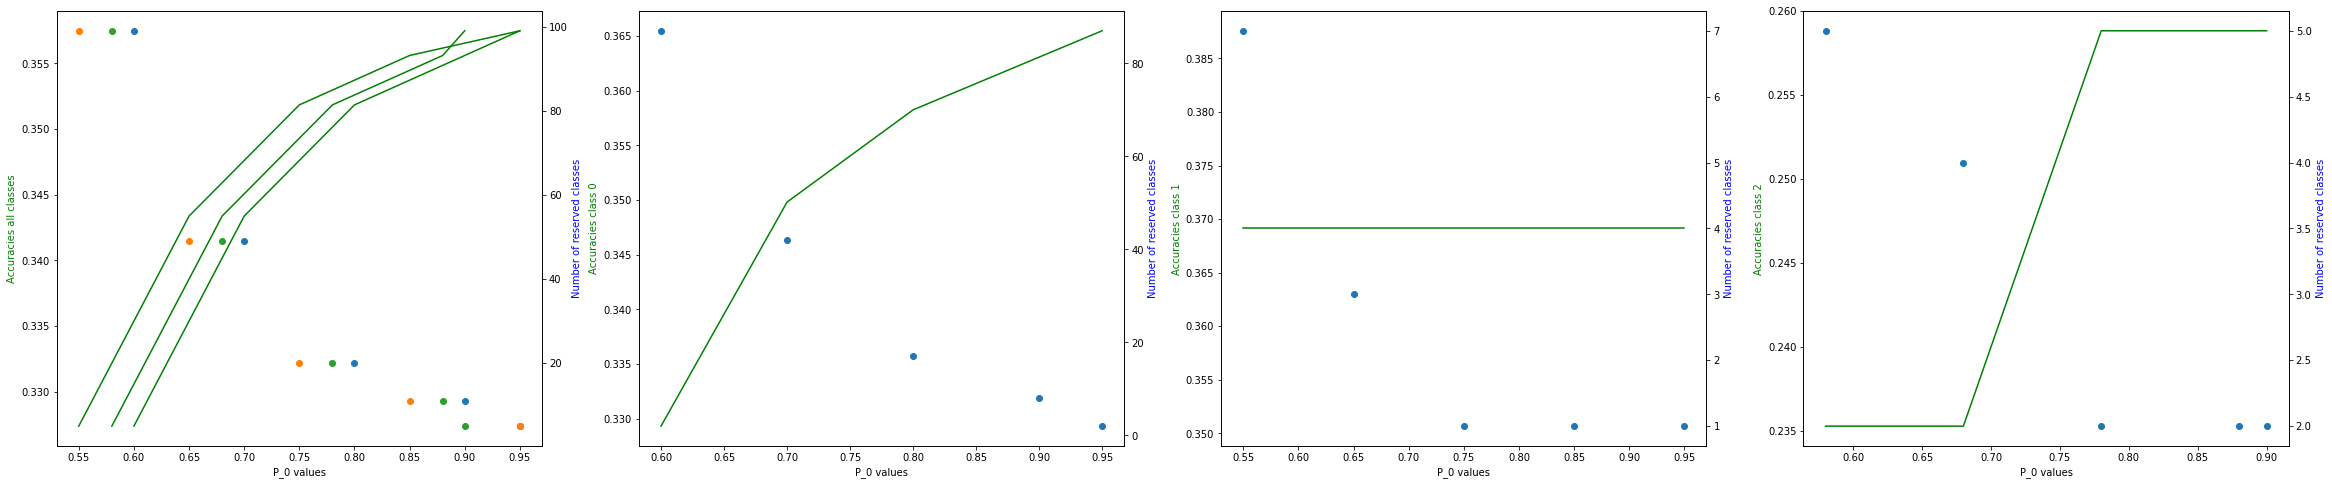

In [ ]:
###### Plot accuracy and reserved classes against P_0
from sklearn.metrics import accuracy_score

f_threholds = [ 0.9 + i / 100.0 for i in range(0, 11) ]

for f_threshold in f_threholds:
  print(f'using projection threshold {f_threshold}')
  projection_thresholds = [f_threshold for c in C]
  classifier = MahalanobisClassifier()
  classifier.fit(X_train, y_train, Q, C, project=True, projection_thresholds=projection_thresholds)

  #p_0_s = np.array([np.linspace(0.5, 1, len(C)) for i in range(0,5)])
  p_0_s = np.array([[0.6,  0.55,  0.58 ],
 [0.7, 0.65, 0.68],
 [0.8, 0.75, 0.78],
 [0.9, 0.85, 0.88],
 [0.95, 0.95, 0.9]])


  accuracies = []
  number_of_reserved_class = []

  accuracies_by_class = [[] for c in C]
  number_of_reserved_class_by_class = [[] for c in C]

  for p_0 in p_0_s:

    predictions = []
    for x in X_test:
      predicted_c = classifier.predict(x, p_0=p_0)
      predictions.append(predicted_c)

    count_by_class = [.0 for c in C]
    count_match_by_class = [.0 for c in C]
    count_reserved_class_by_class = [.0 for c in C]
    for y_predicted, y_true in zip(predictions, y_test):
      count_by_class[y_true] += 1
      if y_predicted == 'reserved class':
        count_reserved_class_by_class[y_true] += 1
      elif y_predicted == y_true:
        count_match_by_class[y_true] += 1
    for c in C:
      accuracy_by_class = count_match_by_class[c] / count_by_class[c]
      accuracies_by_class[c].append(accuracy_by_class)
      number_of_reserved_class_by_class[c].append(count_reserved_class_by_class[c])

    count = np.sum([1 for y_predicted, y_true in zip(predictions, y_test) if str(y_predicted) == str(y_true)])
    total = len(y_test)
    accuracies_by_class
    accuracy = count/total
    accuracies.append(accuracy)
    reserved = predictions.count('reserved class')
    number_of_reserved_class.append(reserved)

  # print(accuracies)
  # print(accuracies_by_class)
  # print(number_of_reserved_class)

  import matplotlib.pyplot as plt

  fig, axs = plt.subplots(1, 1 + len(C), figsize=(40, 8))

  axa, *axs = axs

  axa2 = axa.twinx()
  axa.plot(p_0_s, accuracies, 'g-')
  axa2.plot(p_0_s, number_of_reserved_class, 'o')

  axa.set_xlabel('P_0 values')
  axa.set_ylabel('Accuracies all classes', color='g')
  axa2.set_ylabel('Number of reserved classes', color='b')

  # plot by class

  for c, axc in zip(C, axs):
    axc2 = axc.twinx()
    axc.plot(p_0_s[:, c], accuracies_by_class[c], 'g-')
    axc2.plot(p_0_s[:, c], number_of_reserved_class_by_class[c], 'o')

    axc.set_xlabel('P_0 values')
    axc.set_ylabel(f'Accuracies class {c}', color='g')
    axc2.set_ylabel('Number of reserved classes', color='b')

  plt.show()


[[0.55729795 0.69127517 0.16470588]
 [0.4933655  0.82550336 0.        ]
 [0.8854041  0.00671141 0.08235294]
 [0.37394451 0.59731544 0.2       ]
 [0.14234017 0.77181208 0.32941176]
 [1.         0.         0.        ]
 [0.95536791 0.         0.47058824]
 [0.67430639 0.38926174 0.48235294]
 [0.1013269  0.7114094  0.49411765]
 [0.09408926 0.06711409 0.8       ]
 [0.38118215 0.37583893 0.76470588]
 [0.14234017 0.62416107 0.54117647]
 [0.16405308 0.61744966 0.61176471]
 [0.13751508 0.20134228 0.57647059]
 [0.14234017 0.61073826 0.37647059]
 [0.92882992 0.         0.        ]
 [0.37032569 0.59060403 0.63529412]
 [0.41013269 0.66442953 0.68235294]
 [0.37273824 0.63087248 0.68235294]
 [0.24366707 0.61073826 0.64705882]
 [0.54282268 0.51006711 0.28235294]]
{0: [0, 2, 5, 6, 7, 15, 20], 1: [0, 1, 4, 8, 11, 12, 14, 17, 18, 19], 2: [6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19]}
The number of principal component for this class is 2
The number of principal component for this class is 3
The number of pr

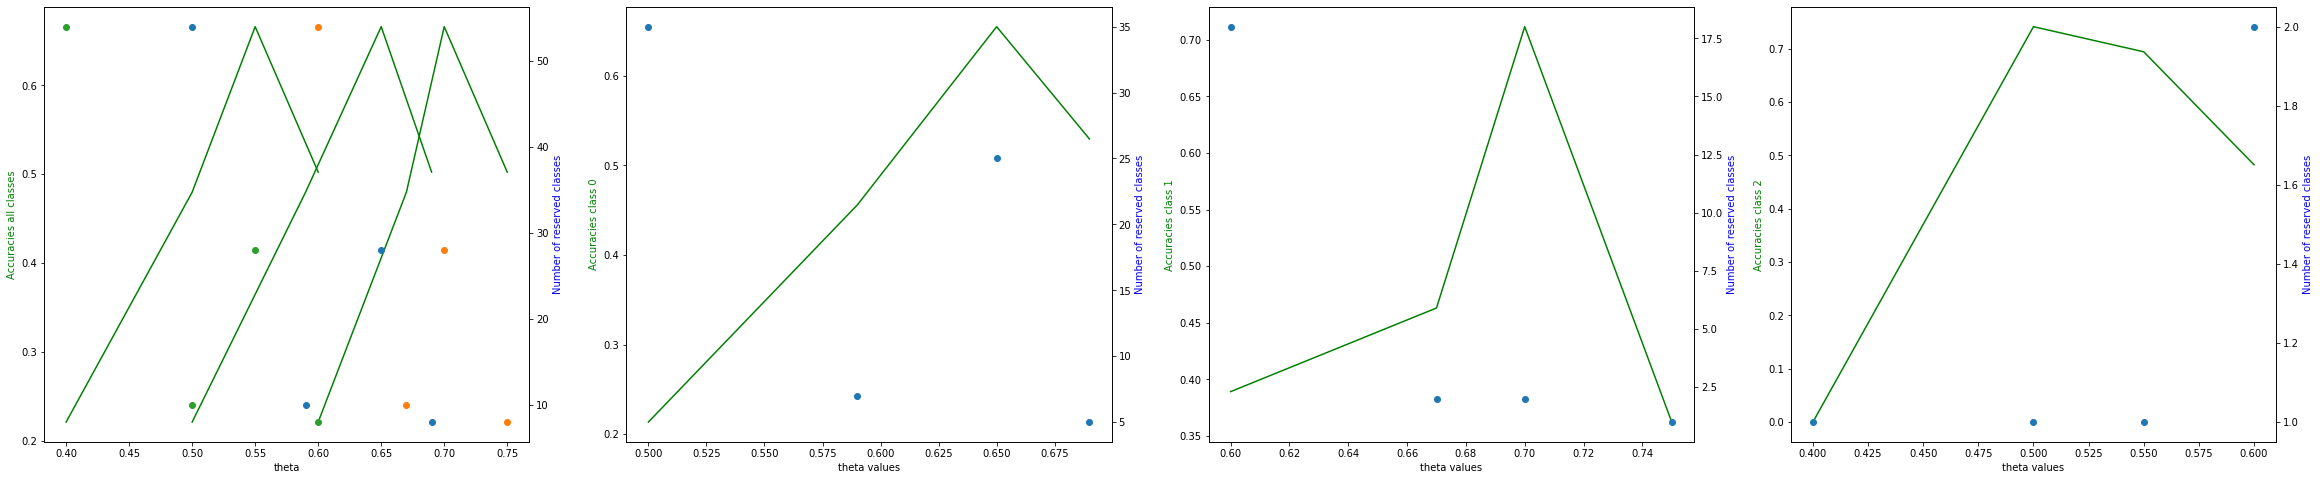

In [ ]:
###### Plot accuracy and reserved classes against theta


## A 
C = np.unique(y)
I = range(0, X.shape[1])
classifiers = feature_classifiers(I, C)
p_0s = [[.8 for c in C] for i in I]
A = generate_A(X_test, y_test, I, C, classifiers, p_0s)
print(A)


## thetas
f = [0.95, 0.95, 0.95]
p_0 = [0.85, 0.85, 0.85]
thetas = [[0.5, 0.6, 0.4 ], [0.59, 0.67, 0.5], [0.65, 0.7, 0.55], [0.69, 0.75, 0.6]]

accuracies = []
number_of_reserved_class = []
accuracies_by_class = [[] for c in C]
number_of_reserved_class_by_class = [[] for c in C]

for theta in thetas:
  Q = calculate_Q(C, I, A, theta)
  print(Q)
  classifier = MahalanobisClassifier()
  classifier.fit(X_train, y_train, Q, C, project=True, projection_thresholds = f)
  predictions = []
  for x in X_test:
    predicted_c = classifier.predict(x, p_0 = p_0)
    predictions.append(predicted_c)

  count_by_class = [.0 for c in C]
  count_match_by_class = [.0 for c in C]
  count_reserved_class_by_class = [.0 for c in C]
  for y_predicted, y_true in zip(predictions, y_test):
    count_by_class[y_true] += 1
    if y_predicted == 'reserved class':
      count_reserved_class_by_class[y_true] += 1
    elif y_predicted == y_true:
      count_match_by_class[y_true] += 1
  for c in C:
    accuracy_by_class = count_match_by_class[c] / count_by_class[c]
    accuracies_by_class[c].append(accuracy_by_class)
    number_of_reserved_class_by_class[c].append(count_reserved_class_by_class[c])

  count = np.sum([1 for y_predicted, y_true in zip(predictions, y_test) if str(y_predicted) == str(y_true)])
  total = len(y_test)
  accuracies_by_class
  accuracy = count/total
  accuracies.append(accuracy)
  reserved = predictions.count('reserved class')
  number_of_reserved_class.append(reserved)

print("xxxxx all the prints xxxxxx")
print(accuracies)
print(accuracies_by_class)
print(number_of_reserved_class)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1 + len(C), figsize=(40, 8))

axa, *axs = axs

axa2 = axa.twinx()
axa.plot(thetas, accuracies, 'g-')
axa2.plot(thetas, number_of_reserved_class, 'o')

axa.set_xlabel('theta')
axa.set_ylabel('Accuracies all classes', color='g')
axa2.set_ylabel('Number of reserved classes', color='b')

# plot by class

for c, axc in zip(C, axs):
  axc2 = axc.twinx()
  axc.plot(np.array(thetas)[:, c], accuracies_by_class[c], 'g-')
  axc2.plot(np.array(thetas)[:, c], number_of_reserved_class_by_class[c], 'o')

  axc.set_xlabel('theta values')
  axc.set_ylabel(f'Accuracies class {c}', color='g')
  axc2.set_ylabel('Number of reserved classes', color='b')

plt.show()



[[0.55729795 0.69127517 0.16470588]
 [0.4933655  0.82550336 0.        ]
 [0.8854041  0.00671141 0.08235294]
 [0.37394451 0.59731544 0.2       ]
 [0.14234017 0.77181208 0.32941176]
 [1.         0.         0.        ]
 [0.95536791 0.         0.47058824]
 [0.67430639 0.38926174 0.48235294]
 [0.1013269  0.7114094  0.49411765]
 [0.09408926 0.06711409 0.8       ]
 [0.38118215 0.37583893 0.76470588]
 [0.14234017 0.62416107 0.54117647]
 [0.16405308 0.61744966 0.61176471]
 [0.13751508 0.20134228 0.57647059]
 [0.14234017 0.61073826 0.37647059]
 [0.92882992 0.         0.        ]
 [0.37032569 0.59060403 0.63529412]
 [0.41013269 0.66442953 0.68235294]
 [0.37273824 0.63087248 0.68235294]
 [0.24366707 0.61073826 0.64705882]
 [0.54282268 0.51006711 0.28235294]]
{0: [2, 5, 6, 15], 1: [1, 4], 2: [9, 10, 12, 16, 17, 18, 19]}
The number of principal component for this class is 1
The number of principal component for this class is 2
The number of principal component for this class is 2
{0: [2, 5, 6, 15], 

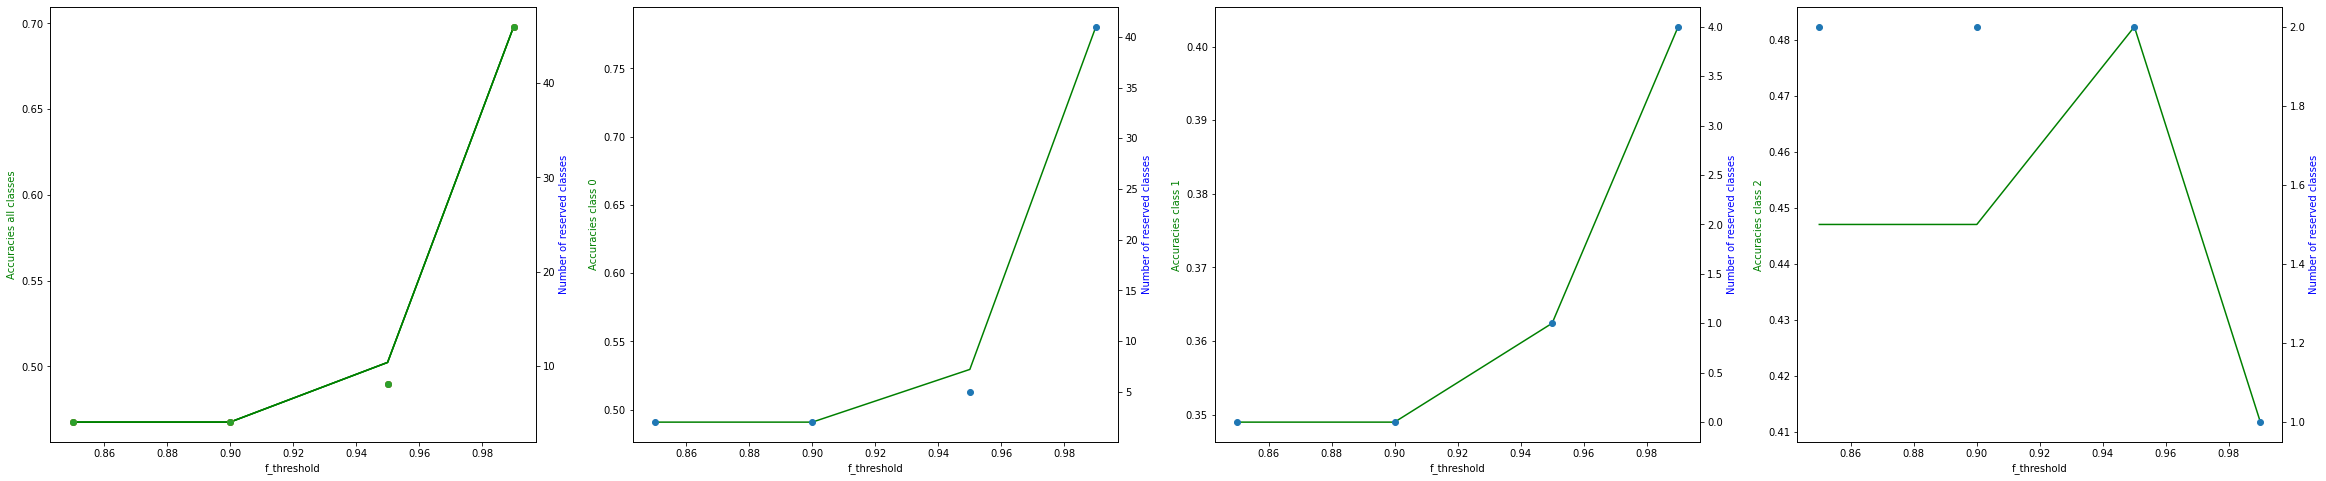

In [ ]:
###### Plot accuracy and reserved classes against f 

## A 
C = np.unique(y)
I = range(0, X.shape[1])
classifiers = feature_classifiers(I, C)
p_0s = [[.8 for c in C] for i in I]
A = generate_A(X_test, y_test, I, C, classifiers, p_0s)
print(A)


## thetas
f_s = [[0.85, 0.85, 0.85], [0.9, .9, .9], [.95, .95, .95], [.99, .99, .99]]
p_0 = [0.85, 0.85, 0.85]
thetas = [[0.6, 0.6, 0.6]]

accuracies = []
number_of_reserved_class = []
accuracies_by_class = [[] for c in C]
number_of_reserved_class_by_class = [[] for c in C]

for f in f_s:
  Q = calculate_Q(C, I, A, theta)
  print(Q)
  classifier = MahalanobisClassifier()
  classifier.fit(X_train, y_train, Q, C, project=True, projection_thresholds = f)
  predictions = []
  for x in X_test:
    predicted_c = classifier.predict(x, p_0 = p_0)
    predictions.append(predicted_c)

  count_by_class = [.0 for c in C]
  count_match_by_class = [.0 for c in C]
  count_reserved_class_by_class = [.0 for c in C]
  for y_predicted, y_true in zip(predictions, y_test):
    count_by_class[y_true] += 1
    if y_predicted == 'reserved class':
      count_reserved_class_by_class[y_true] += 1
    elif y_predicted == y_true:
      count_match_by_class[y_true] += 1
  for c in C:
    accuracy_by_class = count_match_by_class[c] / count_by_class[c]
    accuracies_by_class[c].append(accuracy_by_class)
    number_of_reserved_class_by_class[c].append(count_reserved_class_by_class[c])

  count = np.sum([1 for y_predicted, y_true in zip(predictions, y_test) if str(y_predicted) == str(y_true)])
  total = len(y_test)
  accuracies_by_class
  accuracy = count/total
  accuracies.append(accuracy)
  reserved = predictions.count('reserved class')
  number_of_reserved_class.append(reserved)

print("xxxxx all the prints xxxxxx")
print(accuracies)
print(accuracies_by_class)
print(number_of_reserved_class)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1 + len(C), figsize=(40, 8))

axa, *axs = axs

axa2 = axa.twinx()
axa.plot(f_s, accuracies, 'g-')
axa2.plot(f_s, number_of_reserved_class, 'o')

axa.set_xlabel('f_threshold')
axa.set_ylabel('Accuracies all classes', color='g')
axa2.set_ylabel('Number of reserved classes', color='b')

# plot by class

for c, axc in zip(C, axs):
  axc2 = axc.twinx()
  axc.plot(np.array(f_s)[:, c], accuracies_by_class[c], 'g-')
  axc2.plot(np.array(f_s)[:, c], number_of_reserved_class_by_class[c], 'o')

  axc.set_xlabel('f_threshold')
  axc.set_ylabel(f'Accuracies class {c}', color='g')
  axc2.set_ylabel('Number of reserved classes', color='b')

plt.show()



 ## Check covariance decomposition 

In [ ]:
space = classifier.spaces[0]
print("\nspace.Sigma\n")
print(space.Sigma)
# print(space.T)
# print('')
# print(space.Lambda)
# print('')
print("\nspace.X\n")
print(space.X)
print("\nspace.lambdas\n")
print(space.lambdas)
print("\nspace.V\n")
print(space.V)
print("\nspace.Lambda\n")
print(space.Lambda)
print("\nspace.V @ space.Lambda @ space.V.T\n")
print(space.V @ space.Lambda @ space.V.T)

print("\nsubspace.X\n")
print(space.subspace.X)
print("\nspace.subspace.Sigma\n")
print(space.subspace.Sigma)
print("\nspace.subspace.Lambda\n")
print(space.subspace.Lambda)
print("\nspace.subspace.V\n")
print(space.subspace.V)
print("\nspace.subspace.V @ space.subspace.Lambda @ space.subspace.V.T\n")
print(space.subspace.V @ space.subspace.Lambda @ space.subspace.V.T)
# print('')
# print(space.subspace.inverse_Lambda)


space.Sigma

[[0.10321046 0.07969084 0.00323424 0.00600476]
 [0.07969084 0.13208086 0.009239   0.00384067]
 [0.00323424 0.009239   0.01629013 0.00419738]
 [0.00600476 0.00384067 0.00419738 0.00846611]]

space.X

[[4.6 3.1 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [4.8 3.  1.4 0.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [4.9 3.  1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.1 3.8 1.5 0.3]
 [4.7 3.2 1.6 0.2]
 [5.  3.3 1.4 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [5.1 3.7 1.5 0.4]
 [4.9 3.1 1.5 0.1]
 [4.6 3.2 1.4 0.2]]

space.lambdas

[0.19934955 0.03729093 0.00623796 0.01716913]

space.V

[[-0.63928661 -0.76188368 -0.0925031   0.04784413]
 [-0.76641195  0.62822562  0.06060657 -0.11946608]
 [-0.05081584  0.14837071 -0.40493285  0.90079591]
 [-0.03664

## distances experiments

In [ ]:
import numpy as np

# for consistent results
np.random.seed(7)

n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [ ]:
space = Space(X)
print(space.Sigma)

print(np.cov(X, rowvar=False, bias=False))

[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]
[[ 3.2638466  -0.24839293]
 [-0.24839293  7.58028225]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


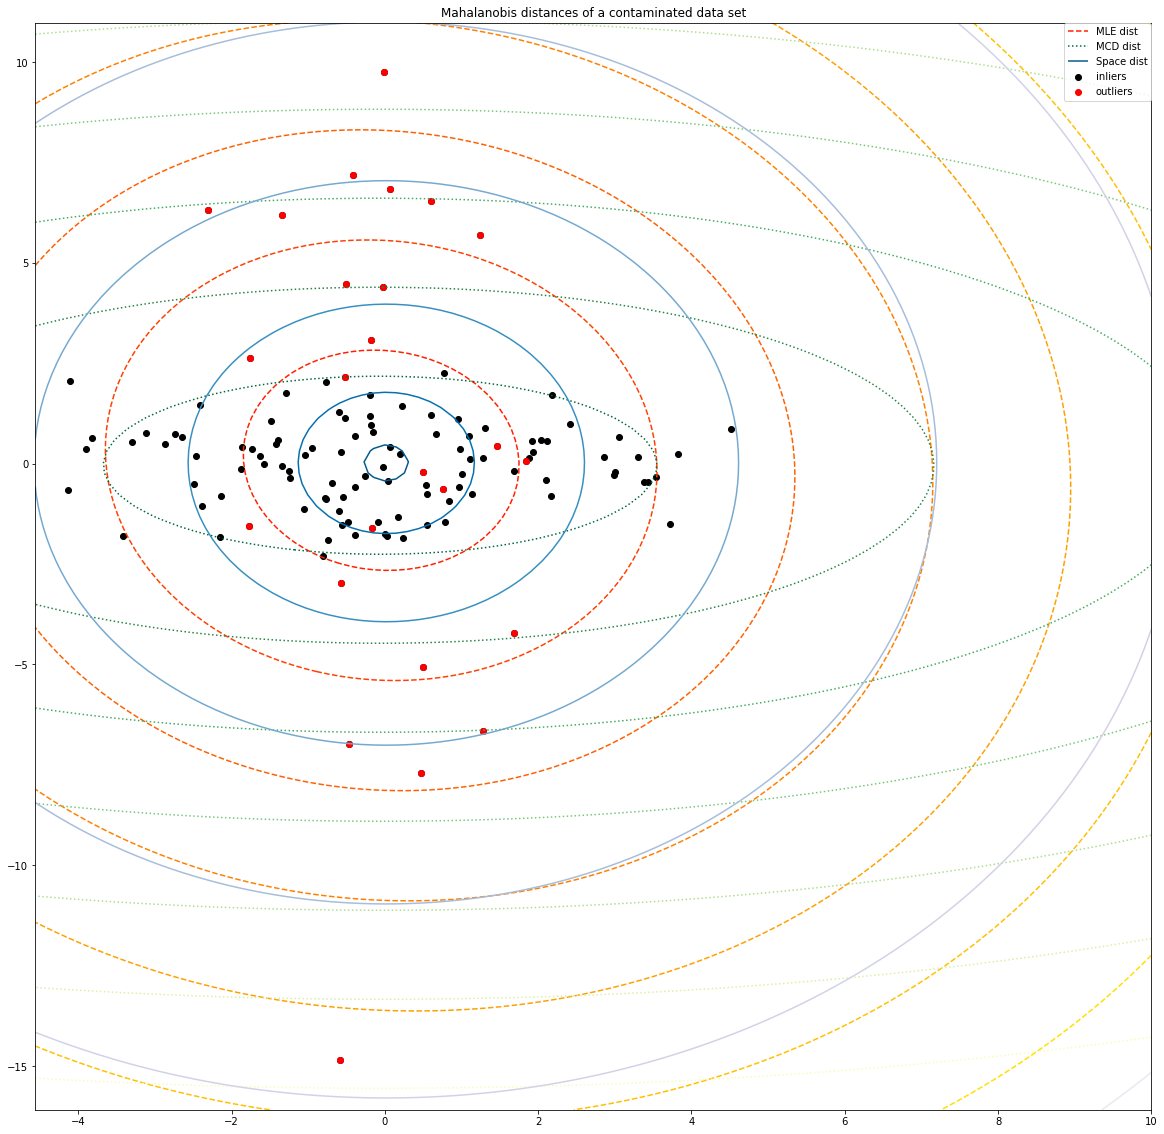

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.autumn, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlGn_r, linestyles='dotted')
# Calculate the MCD based Mahalanobis distances
mahal_space = []
for zzz in zz:
  mahal_space.append(np.sqrt(space.distance_lambda(zzz)))
mahal_space = np.array(mahal_space).reshape(xx.shape)
space_contour = ax.contour(xx, yy, np.sqrt(mahal_space),
                            cmap=plt.cm.PuBu_r, linestyles='solid')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1], space_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'Space dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

plt.show()